# Отрицательное биномиальное распределение в Python
Библиотека `scipy`

In [1]:
from scipy.stats import nbinom
import numpy as np

from math import comb # биномиальные коэффициенты

import matplotlib.pyplot as plt

Пусть $X\sim NB(n=5, p=0.3)$

Зададим распределение с заданными параметрами

In [2]:
n, p = 5, 0.3
rv = nbinom(n, p)

## Распределение вероятностей

Для вычисления вероятностей используем следующие методы

|Вероятность|Метод|
|-|-|
|$f(k)=P(X=k)$|`.pmf(k)`|
|$F(k)=P(X\leq k)$|`.cdf(k)`|
|$P(X>k)$|`.sf(k)=1-.cdf(k)`|
|$P(k_1<X\leq k_2)$|`.cdf(k2)-.cdf(k1)`|

Для для вычисления вероятности $P(k_1\leq X\leq k_2)$ можно использовать следующее наблюдение
$$
	P(k_1\leq X\leq k_2)=P(k_1-1< X\leq k_2)
$$


### Пример 1
Вычислим вероятность $P(X=4)=f(4)$



In [3]:
rv.pmf(k=4)

np.float64(0.040841009999999976)

Вычисли её непосредственно по формуле 

$$
	P(X=k)=f(k)=C_{k+n-1}^{n-1}\cdot (1-p)^{k}p^n
$$

In [4]:
k = 4
comb(k+n-1, n-1)*((1-p)**k)*(p**n)

0.040841009999999976

### Пример 2
Вычислим вероятности

$$
\begin{aligned}
	&P(X\leq 5) & &P(X>3) & &P(2<X\leq 6)
\end{aligned}
$$

In [5]:
rv.cdf(5), rv.sf(3), rv.cdf(6)-rv.cdf(2)

(np.float64(0.15026833259999992),
 np.float64(0.9420323500000001),
 np.float64(0.1815091172999999))

## Математическое ожидание, дисперсия, стандартное отклонение

Для вычисления используем следующие методы

|Величина|Метод|
|-|-|
|Математическое ожидание|`.mean()`|
|Дисперсия|`.var()`|
|Стандартное отклонение|`.std()`|

### Пример 3

Вычислим $E(X), Var(X), \sigma(X)$


In [6]:
rv.mean(), rv.var(), rv.std()

(np.float64(11.666666666666668),
 np.float64(38.88888888888889),
 np.float64(6.236095644623236))

Можно вычислить непосредственно по формулам

$$
\begin{aligned}
	E(X)&=\frac{n(1-p)}{p} & Var(X)&=\frac{n(1-p)}{p^2} & \sigma(X)&=\sqrt{Var(X)}
\end{aligned}
$$

In [7]:
n*(1-p)/p, n*(1-p)/p**2, (n*(1-p)/p**2)**0.5

(11.666666666666668, 38.88888888888889, 6.236095644623236)

## Визуализация распределения вероятностей

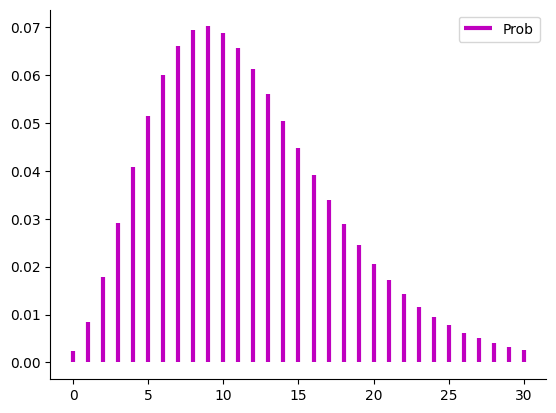

In [8]:
x_min, x_max = 0, 30
x = np.arange(start=x_min, stop=x_max+1, step=1)

fig, ax =  plt.subplots(1,1)

ax.vlines(x, 0, rv.pmf(x), linestyle='-', lw=3,  colors='m', label='Prob')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.show()

## Визуализация функции распределения

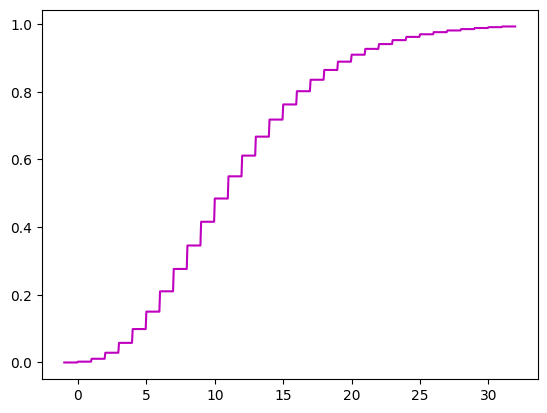

In [9]:
x_min, x_max = 0, 30
x = np.arange(start=x_min-1, stop=x_max+2, step=0.05)

plt.plot(x, rv.cdf(np.floor(x)), color='m')
plt.show()